In [1]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#追記
import json
import datetime
import math
import os

In [2]:
# tmp_img =  cv2.imread("./source/book4.jpg")
tmp_img =  cv2.imread("./source/book.jpg")

In [3]:
# def auto_canny(image, sigma = 0.99):
def auto_canny(image, low, up):
    # compute the mediam of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
#     lower = int(max(0, (1.0 - sigma) * v))
#     upper = int(min(255, (1.0 + sigma) *v))
#     edged = cv2.Canny(image, lower, upper)
    edged = cv2.Canny(image, low, up)

    return edged

In [4]:
gray_img = cv2.cvtColor(tmp_img , cv2.COLOR_BGR2GRAY)

In [5]:
_, gray_img = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)

In [6]:
# cimg = auto_canny(gray_img,170,255 )

c_img = cv2.Canny(gray_img, 10, 255)

In [7]:

contours, hierarchy = cv2.findContours(c_img,  cv2.RETR_LIST,  cv2.CHAIN_APPROX_SIMPLE)
# gray_img

In [8]:
img_height = tmp_img.shape[0]
img_width = tmp_img.shape[1]

In [14]:
for idx, hier in enumerate(contours):
    tmp_area = cv2.contourArea(contours[idx])
    
#     if tmp_area < 500:continue
    x,y,w,h = cv2.boundingRect(contours[idx])
#     print(w)
    if w > img_width*0.5 and h > img_height*0.5:
        print(tmp_area)
        print("x",x)
        print("y",y)
        print("w",w)
        print("h",h)
    else:
        continue
    
    for point in  contours[idx]:
        cv2.circle(tmp_img, (point[0][0] , point[0][1]  ), 15, (0, 255, 255), thickness= 20  ) 

8.0
x 25
y 41
w 743
h 522


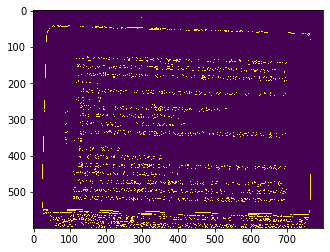

In [10]:

import matplotlib.pyplot as plt
from PIL import Image

# im4p = cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB)

plt.imshow(c_img)

plt.show()

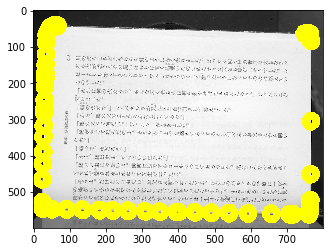

In [11]:

im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
plt.imshow(im4p)
plt.show()

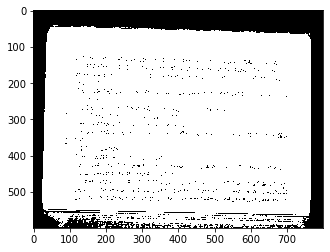

In [12]:
#  2値化の結果
im4p = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)
plt.imshow(im4p)
plt.show()

In [13]:
contours[0][3][0][1]

IndexError: index 3 is out of bounds for axis 0 with size 2

In [ ]:
contours